IMPLEMENTATION USING NUMPY

In [8]:
import numpy as np

In [9]:
class DummyRNN():

  def __init__(self, input_features, output_features):
    self.W = np.random.random((output_features, input_features))
    self.U = np.random.random((output_features, output_features))
    self.b = np.random.random((output_features,))
    self.state = np.zeros(output_features)

  def forward(self, input_data, concatenate):
    memory = []
    for input_t in input_data:
      output_t = np.tanh(self.W @ input_t + self.U @ self.state + self.b)
      memory.append(output_t)
      self.state = output_t
    if concatenate:
      result = np.concatenate(memory, axis=0)
    else:
      result = memory
    return result

In [10]:
time_steps = 100
input_features = 9020
output_features = 6400

model = DummyRNN(input_features, output_features)
dummy_input = np.random.random((time_steps, input_features))
len(model.forward(dummy_input, concatenate=True))

640000

IMPLEMENTATION USING TENSORFLOW

In [12]:
!pip install tensorflow[all]

Data Cleaning

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-15-8e7c27ad5a62>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [24]:
def load_data(max_len, max_features):
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features)
    X_train = preprocessing.sequence.pad_sequences(X_train, max_len)
    X_test = preprocessing.sequence.pad_sequences(X_test, max_len)
    return X_train, y_train, X_test, y_test

In [25]:
max_len = 100
vocab_size = 1000
X_train, y_train, X_test, y_test = load_data(100, 100)

17464789/17464789 [==============================] - 0s 0us/step


Model Development

In [29]:
# Feed Forward Model
def feed_forward(vocab_size, output_dim, input_length):
  main_input = Input(shape=(input_length), dtype='int32')
  x = Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length)(main_input)
  x = Flatten()(x)
  output = Dense(1, activation=tf.nn.sigmoid)(x)
  model = Model(main_input, output)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [31]:
model_1 = feed_forward(vocab_size, 16, max_len)

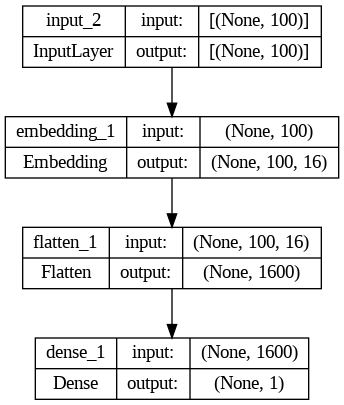

In [32]:
plot_model(model_1, show_shapes=True, show_layer_names=True)

RECURRENT NEURAL NETWORK

In [33]:
def simple_rnn(vocab_size, output_dim, input_length):
  main_input = Input(shape=(input_length), dtype='int32')
  x = Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length)(main_input)
  x = SimpleRNN(32, return_sequences=True)(x)
  x = SimpleRNN(32)(x)
  output = Dense(1, activation=tf.nn.sigmoid)(x)
  model = Model(main_input, output)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [36]:
model_2 = simple_rnn(vocab_size, 16, max_len)

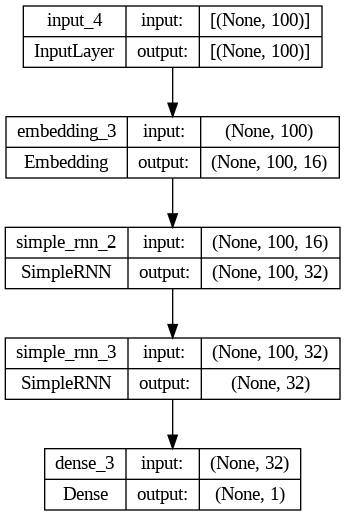

In [37]:
plot_model(model_2, show_shapes=True, show_layer_names=True)

LSTM

In [43]:
def simple_lstm(vocab_size, output_dim, input_length):
  main_input = Input(shape=(input_length), dtype='int32')
  x = Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length)(main_input)
  x = LSTM(32)(x)
  x = Dense(32, activation=tf.nn.relu)(x)
  x = Dense(0.2)(x)
  output = Dense(1, activation=tf.nn.sigmoid)(x)
  model = Model(main_input, output)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [44]:
model_3 = simple_lstm(vocab_size, 16, max_len)

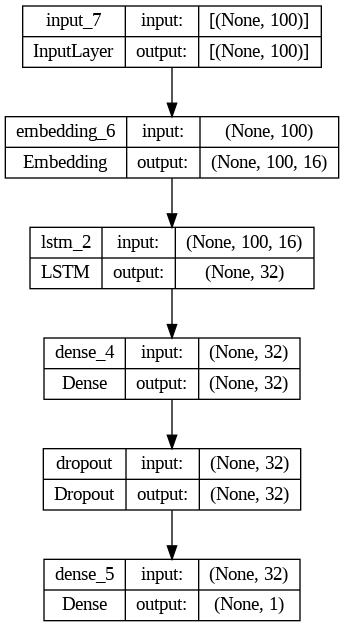

In [45]:
plot_model(model_3, show_shapes=True, show_layer_names=True)

CONVNET

In [46]:
def simple_cnn(vocab_size, output_dim, input_length):
  main_input = Input(shape=(input_length), dtype='int32')
  x = Embedding(input_dim=vocab_size, output_dim=output_dim, input_length=input_length)(main_input)
  x = Conv1D(32, 7, activation=tf.nn.relu)(x)
  x = MaxPooling1D(5)(x)
  x = Conv1D(32, 7, activation=tf.nn.relu)(x)
  x = GlobalMaxPool1D()(x)
  output = Dense(1)(x)
  model = Model(main_input, output)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [47]:
model_4 = simple_cnn(vocab_size, 16, max_len)

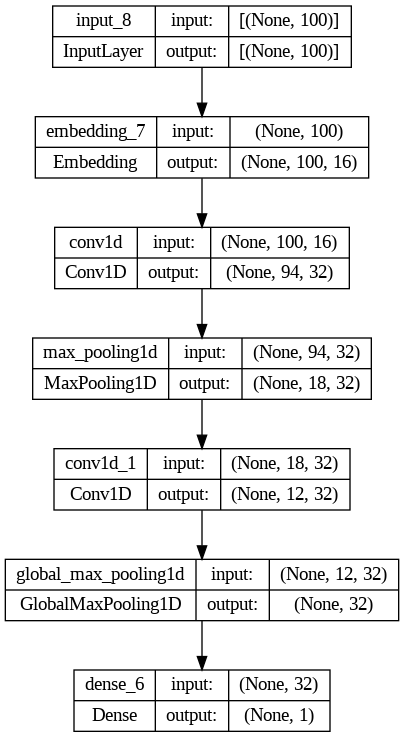

In [48]:
plot_model(model_4, show_shapes=True, show_layer_names=True)

MODEL TRAINING - ALL FOUR MODELS

In [49]:
history_1 = model_1.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=10,
                        validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 5s 6ms/step - loss: 0.6537 - accuracy: 0.6161 - val_loss: 0.5926 - val_accuracy: 0.6868
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5757 - accuracy: 0.6942 - val_loss: 0.5762 - val_accuracy: 0.6946
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5588 - accuracy: 0.7121 - val_loss: 0.5734 - val_accuracy: 0.7006
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5486 - accuracy: 0.7171 - val_loss: 0.5741 - val_accuracy: 0.7030
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5389 - accuracy: 0.7251 - val_loss: 0.5783 - val_accuracy: 0.6956
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5311 - accuracy: 0.7301 - val_loss: 0.5908 - val_accuracy: 0.6894
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5237 - accuracy: 0.7365 - val_loss: 0.5878 - val_accuracy: 0.6894
Epoch 

In [50]:
history_2 = model_2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=10,
                        validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 30s 45ms/step - loss: 0.6944 - accuracy: 0.5100 - val_loss: 0.6942 - val_accuracy: 0.5124
Epoch 2/10
625/625 [==============================] - 27s 43ms/step - loss: 0.6860 - accuracy: 0.5472 - val_loss: 0.6960 - val_accuracy: 0.5296
Epoch 3/10
625/625 [==============================] - 29s 46ms/step - loss: 0.6717 - accuracy: 0.5802 - val_loss: 0.6801 - val_accuracy: 0.5660
Epoch 4/10
625/625 [==============================] - 26s 42ms/step - loss: 0.6533 - accuracy: 0.6137 - val_loss: 0.7325 - val_accuracy: 0.5680
Epoch 5/10
625/625 [==============================] - 32s 51ms/step - loss: 0.6561 - accuracy: 0.6126 - val_loss: 0.6554 - val_accuracy: 0.6156
Epoch 6/10
625/625 [==============================] - 27s 43ms/step - loss: 0.6650 - accuracy: 0.5931 - val_loss: 0.6668 - val_accuracy: 0.5908
Epoch 7/10
625/625 [==============================] - 27s 43ms/step - loss: 0.6378 - accuracy: 0.6384 - val_loss: 0.6552 - val_accuracy:

In [51]:
history_3 = model_3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=10,
                        validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 27s 39ms/step - loss: 0.6355 - accuracy: 0.6305 - val_loss: 0.5812 - val_accuracy: 0.6982
Epoch 2/10
625/625 [==============================] - 24s 38ms/step - loss: 0.5884 - accuracy: 0.6884 - val_loss: 0.5831 - val_accuracy: 0.6966
Epoch 3/10
625/625 [==============================] - 23s 36ms/step - loss: 0.5761 - accuracy: 0.6966 - val_loss: 0.5684 - val_accuracy: 0.6998
Epoch 4/10
625/625 [==============================] - 22s 36ms/step - loss: 0.5753 - accuracy: 0.6959 - val_loss: 0.5674 - val_accuracy: 0.6994
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 0.5699 - accuracy: 0.7028 - val_loss: 0.5683 - val_accuracy: 0.7092
Epoch 6/10
625/625 [==============================] - 24s 38ms/step - loss: 0.5695 - accuracy: 0.7050 - val_loss: 0.5738 - val_accuracy: 0.6946
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 0.5680 - accuracy: 0.7041 - val_loss: 0.5681 - val_accuracy:

In [52]:
history_4 = model_4.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=10,
                        validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 7s 9ms/step - loss: 0.6832 - accuracy: 0.5877 - val_loss: 0.6368 - val_accuracy: 0.6308
Epoch 2/10
625/625 [==============================] - 8s 12ms/step - loss: 0.6341 - accuracy: 0.6381 - val_loss: 0.6037 - val_accuracy: 0.6748
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6198 - accuracy: 0.6680 - val_loss: 0.6293 - val_accuracy: 0.6504
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6020 - accuracy: 0.6875 - val_loss: 0.6015 - val_accuracy: 0.6824
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5908 - accuracy: 0.6945 - val_loss: 0.6437 - val_accuracy: 0.6740
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6071 - accuracy: 0.6938 - val_loss: 0.6005 - val_accuracy: 0.6876
Epoch 7/10
625/625 [==============================] - 5s 9ms/step - loss: 0.5743 - accuracy: 0.7059 - val_loss: 0.6164 - val_accuracy: 0.6790
Epo

MODEL EVALUATION

In [53]:
model_1.evaluate(X_test, y_test)    # Feed Forward

782/782 [==============================] - 2s 2ms/step - loss: 0.6207 - accuracy: 0.6752


[0.6207132935523987, 0.6751599907875061]

In [54]:
model_2.evaluate(X_test, y_test)    # RNN

782/782 [==============================] - 12s 15ms/step - loss: 0.6251 - accuracy: 0.6679


[0.6251044273376465, 0.6678799986839294]

In [55]:
model_3.evaluate(X_test, y_test)    # LSTM

782/782 [==============================] - 10s 12ms/step - loss: 0.5652 - accuracy: 0.7075


[0.565211296081543, 0.7075200080871582]

In [56]:
model_4.evaluate(X_test, y_test)   # CNN

782/782 [==============================] - 2s 3ms/step - loss: 0.6229 - accuracy: 0.6568


[0.6229138970375061, 0.6568400263786316]

LEARNING HISTORY

In [65]:
def show_learning_curve(history):
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'])
  plt.subplot(2,1,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Cross Entropy Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'])
  plt.tight_layout()
  plt.show()

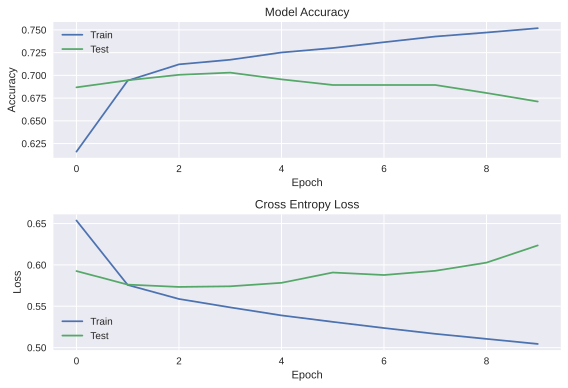

In [66]:
show_learning_curve(history_1)   # Feed Forward

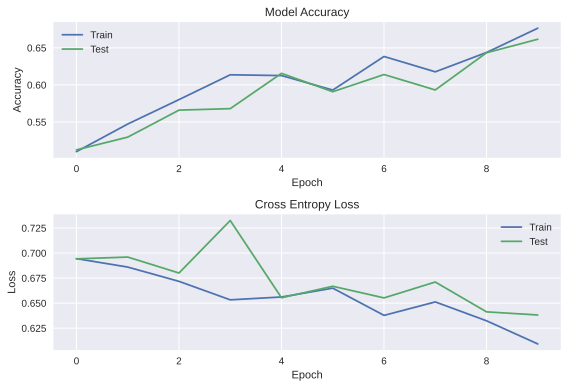

In [67]:
show_learning_curve(history_2)   # RNN

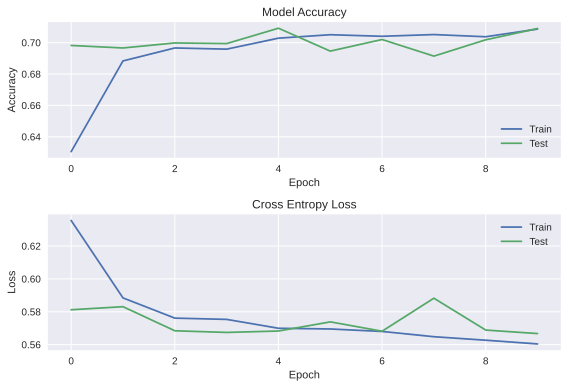

In [68]:
show_learning_curve(history_3)    # LSTM

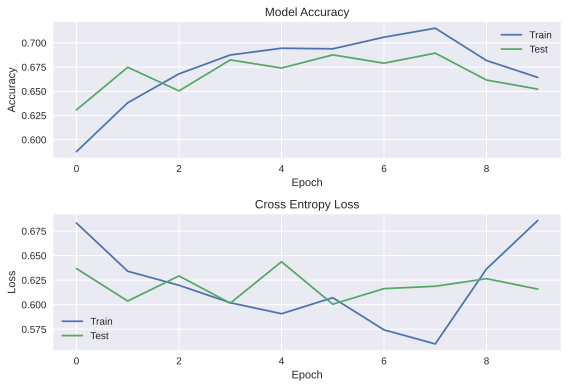

In [69]:
show_learning_curve(history_4)  # CNN